In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [9]:
def fun1(value):
    if (value == 'Male'):
        return 1
    elif (value == 'Female'):
        return 0
    else:
        pass

In [10]:
df['Gender'] = df['Gender'].apply(fun1)

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [12]:
df.shape

(400, 5)

In [13]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

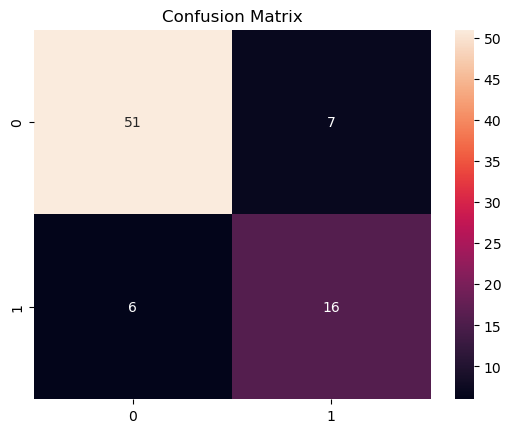

In [42]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")

In [30]:
print(f'True Negative: {cm[0][0]}')
print(f'False Positive: {cm[0][1]}')
print(f'False Negative: {cm[1][0]}')
print(f'True Positive: {cm[1][1]}')

True Negative: 51
False Positive: 7
False Negative: 6
True Positive: 16


In [36]:
accuracy_score(y_test,y_pred)

0.8375

In [37]:
precision_score(y_test,y_pred)

0.6956521739130435

In [38]:
recall_score(y_test,y_pred)

0.7272727272727273

In [39]:
error = 1-(accuracy_score(y_test,y_pred))
print(error)

0.16249999999999998
